# Build dataset from all market data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import warnings
from IPython.display import Image

![Dataset Timeline](media/individual_datasets_DE_timeline.png)
<!--  Image("media/individual_datasets_DE_timeline.png") -->

- DA
    - DA 60min - DE-AT-LU (ENTSO-e)
    - DA 60min - DE-LU (ENTSO-e)
    - DA 15min - DE-LU (ENTSO-e)
- ID
    - IP-index (netztransparenz)
- FCR
    - Procurement price 1W (SMARD)
    - Procurement price 24h (SMARD)
    - Procurement price 4h (SMARD)
- aFRR cap
    - Cost of capacity 12h (SMARD)
    - Cost of capacity 4h (SMARD)
- aFRR en
    - Cost of activation 15min (SMARD)


**Column name schema**
prod_source_dataTimescale_type

type = {
    power price [EUR/MW]:pP, 
    energy price [EUR/MWh]:pE, 
    power/capacity [MW]:P, 
    energy [MWh]:E}

e.g.:
Day-ahead, 60min, prices, SMARD -> DADEATLU_SMARD_60min_prices

## Day-ahead markets

In [3]:
def clean_ENTSOE_data(path, colname, areacode):
    """Reads all csv files in a directory and concatenates them into a single dataframe.
    Drops rows with no currency, sets index to datetime, drops duplicate indexes, drops rows with nans and drop area code column.
    Returns a dataframe with the specified column name"""
    df = pd.DataFrame()
    dirlist = os.listdir(path)
    for i in dirlist:
        if i.endswith(".csv"):
            print('Importing:',path+i)
            df_int = pd.read_csv(path + i)
            df_int.dropna(subset=['Currency'], inplace=True) # Drop rows with no currency
            if len(df_int) != 0: #If there's still rows
                df_int.set_index('MTU (CET/CEST)', inplace=True) 
                df_int.index = pd.to_datetime(df_int.index.str.slice(0,16), format="%d.%m.%Y %H:%M") # Set index to datetime
                # print(df_int.astype('|S').dtypes)
                # Convert all non numbers and dots to nans
                df_int[df_int.columns[0]] = df_int[df_int.columns[0]].astype("string").replace('^[^0-9.]+$', np.nan, regex=True).astype(float)
                df_int = df_int[~df_int.index.duplicated(keep='first')] # Drop duplicate indexes

                df = pd.concat([df,df_int]) # Concatenate to main dataframe
    df.drop(columns=[areacode, 'Currency'], inplace=True)
    df.rename(columns={'Day-ahead Price [EUR/MWh]': colname}, inplace=True)
    df.sort_index(inplace=True) # Sort index
    df.dropna(inplace=True) # Drop rows with nans
    return df


ENTSOE_DE_DATA_dir = "../../20_data/entsoe_data/DE"
DA_60min_DEATLU_subdir = "/DA_60min/DE-AT-LU/" # 'BZN|DE-AT-LU'
DA_60min_DELU_subdir = "/DA_60min/DE-LU/" # 'BZN|DE-LU'
DA_15min_DELU_subdir = "/DA_15min/DE-LU/" # 'BZN|DE-LU'

df_DA_60min_DEATLU = (clean_ENTSOE_data(ENTSOE_DE_DATA_dir + DA_60min_DEATLU_subdir, 'DADEATLU_ENTSOE_60min_pE', 'BZN|DE-AT-LU'))
# print(df_DA_60min_DEATLU.index.min(), df_DA_60min_DEATLU.index.max())

df_DA_60min_DELU = (clean_ENTSOE_data(ENTSOE_DE_DATA_dir + DA_60min_DELU_subdir, 'DADELU_ENTSOE_60min_pE', 'BZN|DE-LU'))
# print(df_DA_60min_DELU.index.min(), df_DA_60min_DELU.index.max())

df_DA_15min_DELU = (clean_ENTSOE_data(ENTSOE_DE_DATA_dir + DA_15min_DELU_subdir, 'DADELU_ENTSOE_15min_pE', 'BZN|DE-LU')) 
# print(df_DA_15min_DELU.index.min(), df_DA_15min_DELU.index.max())

df_DA = pd.concat([ df_DA_60min_DEATLU, df_DA_60min_DELU, df_DA_15min_DELU], axis=1).sort_index()
#df_DA = df_DA.groupby(df_DA.index).first() # Combine duplicate indexes (15min and 60min intervals)
# df_DA.plot()

df_DA

Importing: ../../20_data/entsoe_data/DE/DA_60min/DE-AT-LU/Day-ahead Prices_202001010000-202101010000.csv
Importing: ../../20_data/entsoe_data/DE/DA_60min/DE-AT-LU/Day-ahead Prices_202201010000-202301010000.csv
Importing: ../../20_data/entsoe_data/DE/DA_60min/DE-AT-LU/Day-ahead Prices_202101010000-202201010000.csv
Importing: ../../20_data/entsoe_data/DE/DA_60min/DE-AT-LU/Day-ahead Prices_201901010000-202001010000.csv
Importing: ../../20_data/entsoe_data/DE/DA_60min/DE-AT-LU/Day-ahead Prices_202401010000-202501010000.csv
Importing: ../../20_data/entsoe_data/DE/DA_60min/DE-AT-LU/Day-ahead Prices_202301010000-202401010000.csv
Importing: ../../20_data/entsoe_data/DE/DA_60min/DE-AT-LU/Day-ahead Prices_201801010000-201901010000.csv
Importing: ../../20_data/entsoe_data/DE/DA_60min/DE-AT-LU/Day-ahead Prices_201701010000-201801010000.csv
Importing: ../../20_data/entsoe_data/DE/DA_60min/DE-AT-LU/Day-ahead Prices_201601010000-201701010000.csv
Importing: ../../20_data/entsoe_data/DE/DA_60min/DE-AT-

,DADEATLU_ENTSOE_60min_pE,DADELU_ENTSOE_60min_pE,DADELU_ENTSOE_15min_pE
MTU (CET/CEST),,,
2015-01-05 00:00:00,22.34,NaN,NaN
2015-01-05 01:00:00,17.93,NaN,NaN
2015-01-05 02:00:00,15.17,NaN,NaN
2015-01-05 03:00:00,16.38,NaN,NaN
2015-01-05 04:00:00,17.38,NaN,NaN
...,...,...,...
2024-10-04 22:45:00,NaN,NaN,77.59
2024-10-04 23:00:00,NaN,90.0,105.09
2024-10-04 23:15:00,NaN,NaN,94.00


## Intra-day markets

In [4]:
netztransparenz_DATA_dir = "../../20_data/netztransparenz"
IP_index = "/IP_index/Index Ausgleichsenergiepreis [2024-10-11 17-44-33].csv" 
df_IP_index = pd.read_csv(netztransparenz_DATA_dir + IP_index, sep=";") # Import csv

# Set datetime index
df_IP_index.index = pd.to_datetime(df_IP_index['Datum von'] + " " + df_IP_index['(Uhrzeit) von'], format="%d.%m.%Y %H:%M")

# Drop columns and rename
df_IP_index.drop(columns=(df_IP_index.columns.difference(['ID AEP in €/MWh'])), inplace=True)
df_IP_index.rename(columns={'ID AEP in €/MWh': 'IPindex_netztransparenz_15min_pE'}, inplace=True)

# Change comma to dot and convert to float
df_IP_index['IPindex_netztransparenz_15min_pE'] = df_IP_index['IPindex_netztransparenz_15min_pE'].replace(',', '.', regex=True).astype(float)

df_IP_index = df_IP_index[~df_IP_index.index.duplicated(keep='first')]
 
# df_IP_index

df_IP_index

,IPindex_netztransparenz_15min_pE
2020-07-01 00:00:00,43.75
2020-07-01 00:15:00,37.76
2020-07-01 00:30:00,26.63
2020-07-01 00:45:00,20.38
2020-07-01 01:00:00,33.22
...,...
2024-10-10 22:45:00,115.49
2024-10-10 23:00:00,114.59
2024-10-10 23:15:00,97.92
2024-10-10 23:30:00,99.21


## FCR

### SMARD data

In [5]:
# SMARD import
SMARD_dir = "../../20_data/SMARD"
FCR_subdir = "/FCR/"

df_FCR = pd.DataFrame()
dirlist = os.listdir(SMARD_dir + FCR_subdir)
for i in dirlist:
    if i.endswith(".csv"):
        print('Importing:', i)
        df_int = pd.read_csv(SMARD_dir + FCR_subdir + i, sep=";")
        df_int.set_index('Start date', inplace=True)
        df_int.index = pd.to_datetime(df_int.index, format="%b %d, %Y %I:%M %p")
        df_int.drop(columns=['End date'], inplace=True)
        df_int.rename(columns={'Volume procured [MW] Original resolutions': 'FCR_SMARD_15min_P', 'Procurement price [€/MW] Original resolutions': 'FCR_SMARD_15min_pP'}, inplace=True)
        df_int = df_int.replace(',', '', regex=True)
        df_int = df_int.replace('^[^0-9.]+$', np.nan, regex=True).astype(float)
        df_FCR = pd.concat([df_FCR,df_int]) # Concatenate to main dataframe
df_FCR.sort_index(inplace=True) # Sort index

df_FCR = df_FCR[~df_FCR.index.duplicated(keep='first')]

# Contracted power not considered useful
df_FCR.drop(columns=['FCR_SMARD_15min_P'], inplace=True)
df_FCR_SMARD = df_FCR.copy()
df_FCR
# df_FCR.dropna(inplace=True) # Drop rows with nans
#df_FCR.to_csv('fcr.csv')
# plt.figure(figsize=(10, 5))
# plt.plot(df_FCR.index, df_FCR['procurement_price_EUR_MW'])
# # plt.xlim(pd.Timestamp('2019-05-01'), pd.Timestamp('2023-01-01'))
# # plt.ylim(0, 1000)
# plt.xlabel('Date')
# plt.ylabel('Procurement Price (EUR/MW)')
# plt.title('FCR Procurement Price (2020-2023)')
# plt.grid(True)
# plt.show()

Importing: Frequency_Containment_Reserve_201501010000_202101010000_Quarterhour.csv
Importing: Frequency_Containment_Reserve_202101010000_202501010000_Quarterhour.csv


,FCR_SMARD_15min_pP
Start date,
2015-01-01 00:00:00,NaN
2015-01-01 00:15:00,NaN
2015-01-01 00:30:00,NaN
2015-01-01 00:45:00,NaN
2015-01-01 01:00:00,NaN
...,...
2024-12-31 22:45:00,NaN
2024-12-31 23:00:00,NaN
2024-12-31 23:15:00,NaN


### Regelleistung data

In [6]:
# Regelleistung, starting July 2019, 24h
regelleistung_dir = "../../20_data/regelleistung"
FCR_subdir = "/FCR/"

df_FCR = pd.DataFrame()
dirlist = os.listdir(regelleistung_dir + FCR_subdir)

df_FCR = pd.DataFrame()
for i in dirlist:
    if i.endswith(".xlsx"):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            df_int = pd.read_excel(regelleistung_dir + FCR_subdir + i)
            #print(df_int.columns)
        df_int['period_start'] = df_int['DATE_FROM'] + pd.to_timedelta(df_int['PRODUCTNAME'].apply(lambda x: x.split("_")[1] + ":00:00"))
        df_int['FCR length'] = df_int['PRODUCTNAME'].apply(lambda x: '1D' if x[7:12] == "00_24" else '4h')
        print('Importing:', i)
        if 'DE_SETTLEMENTCAPACITY_PRICE_[EUR/MW]' in df_int.columns:
            df_int['FCR_various_pP'] = df_int['DE_SETTLEMENTCAPACITY_PRICE_[EUR/MW]']
            df_int['FCR_various_P'] = df_int['DE_DEMAND_[MW]']
        else:
            df_int['FCR_various_pP'] = df_int['GERMANY_SETTLEMENTCAPACITY_PRICE_[EUR/MW]']
            df_int['FCR_various_P'] = df_int['GERMANY_DEMAND_[MW]']
            

        df_int.drop(columns=df_int.columns.difference(['period_start', 'FCR length','FCR_various_pP','FCR_various_P']), inplace=True)
        df_int.set_index('period_start', inplace=True)
        df_FCR = pd.concat([df_FCR,df_int]) # Concatenate to main dataframe

df_FCR['FCR_various_pP'] = df_FCR['FCR_various_pP'].astype("string").replace('^[^0-9.]+$', np.nan, regex=True).astype(float)
df_FCR['FCR_various_P'] = df_FCR['FCR_various_P'].astype("string").replace('^[^0-9.]+$', np.nan, regex=True).astype(float)

df_FCR.sort_index(inplace=True) # Sort index
df_FCR = df_FCR[~df_FCR.index.duplicated(keep='first')]

# np.empty((len(df_int),1))

# df_FCR[df_FCR['FCR length'] == '1D']
# df_FCR.loc[df_FCR[df_FCR['FCR length'] == '1D'].index]["FCR_1D_pP"] = 0#df_FCR.loc[df_FCR[df_FCR['FCR length'] == '1D'].index][['FCR_various_pP']]

df_FCR.loc[df_FCR['FCR length'] == '1D',"FCR_regelleistung_1D_pP"] = df_FCR.loc[df_FCR['FCR length'] == '1D','FCR_various_pP']
df_FCR.loc[df_FCR['FCR length'] == '4h',"FCR_regelleistung_4h_pP"] = df_FCR.loc[df_FCR['FCR length'] == '4h','FCR_various_pP']

# Contracted power not useful for FCR
#df_FCR.loc[df_FCR['FCR length'] == '1D',"FCR_regelleistung_1D_P"] = df_FCR.loc[df_FCR['FCR length'] == '1D','FCR_various_P']
#df_FCR.loc[df_FCR['FCR length'] == '4h',"FCR_regelleistung_4h_P"] = df_FCR.loc[df_FCR['FCR length'] == '4h','FCR_various_P']

df_FCR.drop(columns=['FCR_various_pP','FCR_various_P','FCR length'], inplace=True)
df_FCR_regelleistung = df_FCR.copy()
# df_FCR

Importing: RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2021-01-01_2021-12-31.xlsx
Importing: RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2020-01-01_2020-12-31.xlsx
Importing: RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2022-01-01_2022-12-31.xlsx
Importing: RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2023-01-01_2023-12-31.xlsx
Importing: RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2019-01-01_2019-12-31.xlsx


In [7]:
df_FCR = pd.concat([df_FCR_regelleistung,df_FCR_SMARD],axis=1)
df_FCR[df_FCR.first_valid_index():df_FCR.last_valid_index()]


,FCR_regelleistung_1D_pP,FCR_regelleistung_4h_pP,FCR_SMARD_15min_pP
2015-01-05 00:00:00,NaN,NaN,4798.4
2015-01-05 00:15:00,NaN,NaN,4798.4
2015-01-05 00:30:00,NaN,NaN,4798.4
2015-01-05 00:45:00,NaN,NaN,4798.4
2015-01-05 01:00:00,NaN,NaN,4798.4
...,...,...,...
2023-12-31 19:00:00,NaN,NaN,NaN
2023-12-31 19:15:00,NaN,NaN,NaN
2023-12-31 19:30:00,NaN,NaN,NaN
2023-12-31 19:45:00,NaN,NaN,NaN


## aFRR

### SMARD

In [8]:
columns_SMARD_aFRR = ['Volume activated (+) [MWh] Original resolutions',
       'Volume activated (-) [MWh] Original resolutions',
       'Activation price (+) [€/MWh] Original resolutions',
       'Activation price (-) [€/MWh] Original resolutions',
       'Volume procured (+) [MW] Original resolutions',
       'Volume procured (-) [MW] Original resolutions',
       'Procurement price (+) [€/MW] Original resolutions',
       'Procurement price (-) [€/MW] Original resolutions']

# SMARD import
SMARD_dir = "../../20_data/SMARD"
aFRR_subdir = "/aFRR/"

df_aFRR = pd.DataFrame()
dirlist = os.listdir(SMARD_dir + aFRR_subdir)
for i in dirlist:
    if i.endswith(".csv"):
        print('Importing:', i)
        df_int = pd.read_csv(SMARD_dir + aFRR_subdir + i, sep=";",low_memory=False)
        df_int.set_index('Start date', inplace=True)
        df_int.index = pd.to_datetime(df_int.index, format="%b %d, %Y %I:%M %p")
        df_int.drop(columns=['End date'], inplace=True)
        df_int.rename(columns={'Volume activated (+) [MWh] Original resolutions':'aFRRpos_SMARD_15min_E',
        'Volume activated (-) [MWh] Original resolutions':'aFRRneg_SMARD_15min_E',
        'Activation price (+) [€/MWh] Original resolutions':'aFRRpos_SMARD_15min_pE',
        'Activation price (-) [€/MWh] Original resolutions':'aFRRneg_SMARD_15min_pE',
        'Volume procured (+) [MW] Original resolutions':'aFRRpos_SMARD_15min_P',
        'Volume procured (-) [MW] Original resolutions':'aFRRneg_SMARD_15min_P',
        'Procurement price (+) [€/MW] Original resolutions':'aFRRpos_SMARD_15min_pP',
        'Procurement price (-) [€/MW] Original resolutions':'aFRRneg_SMARD_15min_pP'}, inplace=True)
        df_int = df_int.replace(',', '', regex=True)
        df_int = df_int.replace('^[^0-9.]+$', np.nan, regex=True).astype(float)
        df_aFRR = pd.concat([df_aFRR,df_int]) # Concatenate to main dataframe
df_aFRR.sort_index(inplace=True) # Sort index
df_aFRR = df_aFRR[~df_aFRR.index.duplicated(keep='first')]
#df_aFRR.dropna(inplace=True) # Drop rows with nans
# #df_FCR.to_csv('fcr.csv')
# plt.figure(figsize=(10, 5))
# plt.plot(df_aFRR.index, df_aFRR['aFRR_en_pos'])
# plt.xlim(pd.Timestamp('2019-05-01'), pd.Timestamp('2023-01-01'))
# plt.ylim(0, 1000)
# plt.xlabel('Date')
# plt.ylabel('pos en act')
# plt.title('aFRR pos en act')
# plt.grid(True)
# plt.show()

Importing: Automatic_Frequency_Restoration_Reserve_202101010000_202501010000_Quarterhour.csv
Importing: Automatic_Frequency_Restoration_Reserve_201501010000_202101010000_Quarterhour.csv


## Join, test, analyse and export

In [9]:
# Check there are no duplicate indexes in any of the dataframes
print(df_DA.index.duplicated().sum())
print(df_IP_index.index.duplicated().sum())
print(df_FCR.index.duplicated().sum())
print(df_aFRR.index.duplicated().sum())

0
0
0
0


In [23]:
# Join them together
combined_df = pd.concat([df_IP_index,df_aFRR,df_FCR,df_DA],axis=1).asfreq('15min')

# Trim the edges
combined_df = combined_df[combined_df.first_valid_index(): combined_df.last_valid_index()]

# Check diff edges vs len
print((combined_df.index.max()-combined_df.index.min())/pd.to_timedelta('15min'))
print(len(combined_df.asfreq('15min')))

# Export to CSV
combined_df.to_csv('combined_market_data.csv')


342815.0
342816


In [22]:
combined_df[combined_df.index.date == pd.Timestamp('2021-03-28 03:00:00').date()].head(50)


,IPindex_netztransparenz_15min_pE,aFRRpos_SMARD_15min_E,aFRRneg_SMARD_15min_E,aFRRpos_SMARD_15min_pE,aFRRneg_SMARD_15min_pE,aFRRpos_SMARD_15min_P,aFRRneg_SMARD_15min_P,aFRRpos_SMARD_15min_pP,aFRRneg_SMARD_15min_pP,FCR_regelleistung_1D_pP,FCR_regelleistung_4h_pP,FCR_SMARD_15min_pP,DADEATLU_ENTSOE_60min_pE,DADELU_ENTSOE_60min_pE,DADELU_ENTSOE_15min_pE
2021-03-28 00:00:00,53.11,34.0,3.0,87.16,-0.70,2137.0,1926.0,0.32,1.03,NaN,36.39,2.27,NaN,43.77,62.65
2021-03-28 00:15:00,49.64,1.0,2.0,73.70,-1.99,2137.0,1926.0,0.32,1.03,NaN,NaN,2.27,NaN,NaN,51.50
2021-03-28 00:30:00,47.78,10.0,2.0,81.21,-2.32,2137.0,1926.0,0.32,1.03,NaN,NaN,2.27,NaN,NaN,35.04
2021-03-28 00:45:00,50.58,0.0,2.0,73.70,-1.58,2137.0,1926.0,0.32,1.03,NaN,NaN,2.27,NaN,NaN,23.07
2021-03-28 01:00:00,51.50,7.0,3.0,80.01,-0.40,2137.0,1926.0,0.43,1.38,NaN,NaN,3.03,NaN,38.62,57.23
2021-03-28 01:15:00,54.10,10.0,3.0,81.30,-0.02,2137.0,1926.0,0.43,1.38,NaN,NaN,3.03,NaN,NaN,40.59
2021-03-28 01:30:00,47.22,2.0,8.0,75.41,12.78,2137.0,1926.0,0.43,1.38,NaN,NaN,3.03,NaN,NaN,33.90
2021-03-28 01:45:00,49.11,2.0,4.0,76.04,5.05,2137.0,1926.0,0.43,1.38,NaN,NaN,3.03,NaN,NaN,23.88
2021-03-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-28 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
combined_market_data = pd.read_csv('../build_dataset/combined_market_data.csv', index_col=0, parse_dates=True)


Text(0.5, 0, 'Date')

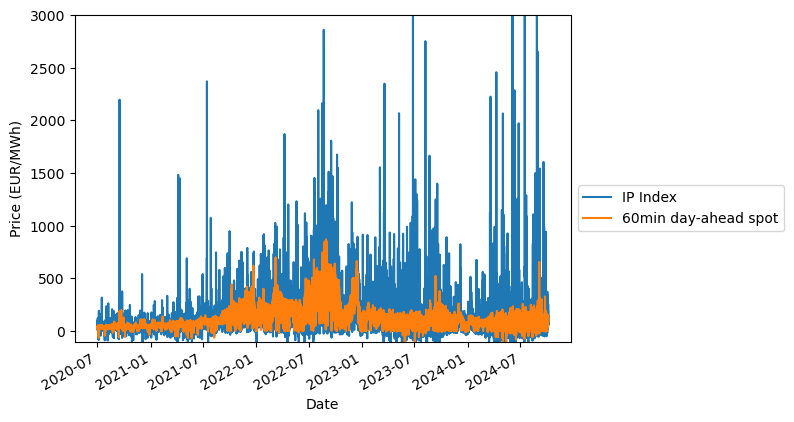

In [12]:
DA_IP = combined_market_data[['IPindex_netztransparenz_15min_pE','DADELU_ENTSOE_60min_pE']]
DA_IP_lim = DA_IP[DA_IP['DADELU_ENTSOE_60min_pE'].first_valid_index():DA_IP['DADELU_ENTSOE_60min_pE'].last_valid_index()][DA_IP['IPindex_netztransparenz_15min_pE'].first_valid_index():DA_IP['IPindex_netztransparenz_15min_pE'].last_valid_index()]
#ax2 = DA_IP_lim['IPindex_netztransparenz_15min_pE'].plot(ylim=(-100,1000))
ax1 = DA_IP_lim['IPindex_netztransparenz_15min_pE'].plot()
ax2 = DA_IP_lim['DADELU_ENTSOE_60min_pE'].dropna().plot(ylim=(-100,3000))
lgd = ax1.legend(['IP Index', '60min day-ahead spot'], bbox_to_anchor=(1,0.5))
ax1.set_ylabel('Price (EUR/MWh)')
ax1.set_xlabel('Date')